In [12]:
import requests
import pandas as pd
from time import sleep
from datetime import datetime
import os
from dotenv import load_dotenv

In [13]:
load_dotenv()

token = os.getenv("TOKEN")
# Define the base URL for the API
base_url = "https://data.cityofnewyork.us/resource/8h9b-rp9u.json"

# Define headers including the app token
headers = {
    'X-App-Token': token
}

# Function to handle pagination, fetch all data, and implement a delay between requests
def fetch_all_data(base_url, headers, start_date, end_date):
    limit = 50000  # Adjust the limit as needed, depending on what the API allows
    offset = 0
    full_data = []

    # Format start and end dates for the API call
    formatted_start_date = datetime.strptime(start_date, "%Y-%m-%d").strftime('%Y-%m-%dT%H:%M:%S.%f')
    formatted_end_date = datetime.strptime(end_date, "%Y-%m-%d").strftime('%Y-%m-%dT%H:%M:%S.%f')

    while True:
        # Construct the query with pagination and date filtering
        query_url = f"{base_url}?$limit={limit}&$offset={offset}" \
                    f"&$where=ARREST_DATE between '{formatted_start_date}' and '{formatted_end_date}'"
        
        response = requests.get(query_url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to fetch data: HTTP Status Code {response.status_code}")
            break
        
        data = response.json()
        if not data:
            break  # Break the loop if no more data is returned
        
        full_data.extend(data)
        offset += limit
        
        # Sleep for 5 seconds before making the next request
        sleep(5)
    
    return full_data

# Set your desired date range
start_date = '2014-01-01'
end_date = '2023-12-31'

# Fetch all data using the defined function
all_data = fetch_all_data(base_url, headers, start_date, end_date)

# Create a DataFrame from the fetched data
historical_df = pd.DataFrame(all_data)


In [ ]:
print(historical_df.shape[0])

2502242


In [ ]:
# Converting the list of data into a DataFrame
historical_df = pd.DataFrame(all_data)
historical_df

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,lon_lat
0,94273780,2014-01-01T00:00:00.000,397,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105,ROBBERY,PL 1601001,F,B,44,0,<18,M,BLACK,1006032.0,243764.0,40.83573258000007,-73.92128542599994,"{'type': 'Point', 'coordinates': [-73.92128542..."
1,94272165,2014-01-01T00:00:00.000,205,"TRESPASS 2, CRIMINAL",352,CRIMINAL TRESPASS,PL 1401500,M,M,26,2,25-44,M,BLACK,996014.0,236126.0,40.814787465000045,-73.95750196499995,"{'type': 'Point', 'coordinates': [-73.95750196..."
2,94273806,2014-01-01T00:00:00.000,750,RESISTING ARREST,359,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 2053000,M,K,60,2,25-44,M,BLACK,986860.0,149123.0,40.57599199300005,-73.99060607299998,"{'type': 'Point', 'coordinates': [-73.99060607..."
3,94272052,2014-01-01T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200501,F,B,41,0,25-44,F,WHITE,1012777.0,237339.0,40.81807858500007,-73.89693760899996,"{'type': 'Point', 'coordinates': [-73.89693760..."
4,94259980,2014-01-01T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,2,25-44,M,WHITE HISPANIC,1010896.0,244231.0,40.837001024000074,-73.90370600899996,"{'type': 'Point', 'coordinates': [-73.90370600..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502237,94266396,2014-01-01T00:00:00.000,419,"LARCENY,GRAND FROM PERSON,UNCLASSIFIED",109,GRAND LARCENY,PL 1553005,F,M,9,0,18-24,M,BLACK,987184.0,205840.0,40.73166765800004,-73.98941508699994,"{'type': 'Point', 'coordinates': [-73.98941508..."
2502238,94303141,2014-01-04T00:00:00.000,511,"CONTROLLED SUBSTANCE, POSSESSION 7",235,DANGEROUS DRUGS,PL 2200300,M,K,81,0,45-64,M,BLACK,1001565.0,192703.0,40.695593270000074,-73.93755983799997,"{'type': 'Point', 'coordinates': [-73.93755983..."
2502239,94294234,2014-01-03T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,110,0,18-24,M,WHITE HISPANIC,1019578.0,208575.0,40.739104490000045,-73.87251786499998,"{'type': 'Point', 'coordinates': [-73.87251786..."
2502240,94305677,2014-01-04T00:00:00.000,567,"MARIJUANA, POSSESSION 4 & 5",235,DANGEROUS DRUGS,PL 2211001,M,Q,107,0,25-44,M,BLACK,1043757.0,198854.0,40.71229315000005,-73.78535246899997,"{'type': 'Point', 'coordinates': [-73.78535246..."


In [ ]:
historical_df.dtypes

arrest_key           object
arrest_date          object
pd_cd                object
pd_desc              object
ky_cd                object
ofns_desc            object
law_code             object
law_cat_cd           object
arrest_boro          object
arrest_precinct      object
jurisdiction_code    object
age_group            object
perp_sex             object
perp_race            object
x_coord_cd           object
y_coord_cd           object
latitude             object
longitude            object
lon_lat              object
dtype: object

<Axes: xlabel='arrest_date'>

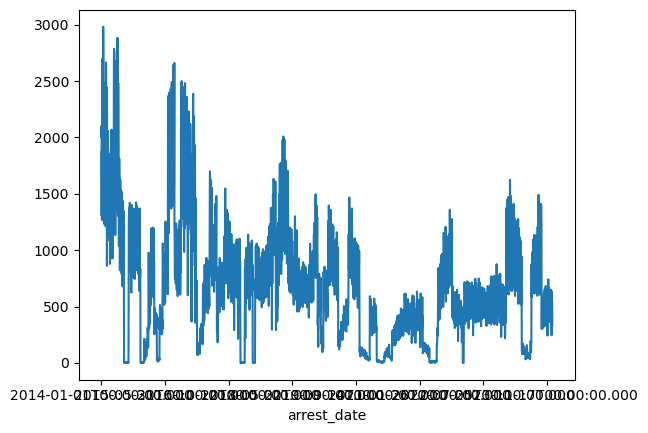

In [ ]:
arrest_counts = historical_df.groupby('arrest_date').size()
arrest_counts.plot()

In [ ]:
historical_df['ofns_desc'].value_counts()

ofns_desc
DANGEROUS DRUGS                           333947
ASSAULT 3 & RELATED OFFENSES              320449
PETIT LARCENY                             213243
FELONY ASSAULT                            156174
VEHICLE AND TRAFFIC LAWS                  149172
                                           ...  
FELONY SEX CRIMES                              8
UNLAWFUL POSS. WEAP. ON SCHOOL                 5
KIDNAPPING AND RELATED OFFENSES                3
UNLAWFUL POSS. WEAP. ON SCHOOL GROUNDS         2
NYS LAWS-UNCLASSIFIED VIOLATION                2
Name: count, Length: 86, dtype: int64

In [ ]:
queens_data = historical_df[historical_df['arrest_boro'] == 'Q']
# queens_crimes_per_year = queens_data.groupby('Year').size()
# queens_crimes_per_year.plot()


KeyError: 'Year'